# Loading the data 

Here we provide a minimalist way to get connectomes of: 

* adult Celegans and
* small central volume of the MICrONS data set,

in order to quickly get into playing the connalysis tools.  The code is taken from:

https://github.com/BlueBrain/ConnectomeUtilities/blob/main/examples

where the data sets are explored in more detail.


In [1]:
from helpers import read_connectomes
import matplotlib.pyplot as plt
import numpy as np

### Celegans data 

We will use the data from *Witvliet et al* found at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8756380/ 

Download the data in the following links:
* https://www.wormatlas.org/images/NeuronType.xls
* https://wormwiring.org/pages/witvliet.html

and place them under``data_dir``.

In [2]:
data_dir="data" # You chosen data directory 
# Loading Celegans connectome 
# The data has 8 stages of development.  This selects the adult worm
developement_stage=8 
conn=read_connectomes.load_C_elegans_stages(data_dir).filter("type").eq("chemical").default(developement_stage)


Warning!!! When accessing the adjacency as a sparse matrix using the .matrix property:
    Connections that are not present at a given stage, but at other stages will be represented as edges,
    but with a value of ``0`` synapses associated with them.  For structural analysis always use .eliminate_zeros


/gpfs/bbp.cscs.ch/home/egassant/basic_connalysis_tutorial/helpers/read_connectomes.py:174: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  edges_chem = syns_chem.index.to_frame().applymap(lambda x: nrn_idxx[x]).reset_index(drop=True)
/gpfs/bbp.cscs.ch/home/egassant/basic_connalysis_tutorial/helpers/read_connectomes.py:175: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  edges_elec = syns_elec.index.to_frame().applymap(lambda x: nrn_idxx[x]).reset_index(drop=True)


You can get the matrix of the ConnectivityMatrix object and the vertex properties simply by doing: 
* ``conn.matrix``
* ``conn.vertices``

In [3]:
display(conn.vertices.head())
type(conn.matrix)

,index,Neuron,Soma Position,Soma Region,Span,Ambiguity,TotHead,TotTail,TotMid,S_Head,R_Head,S_Mid,R_Mid,S_Tail,R_Tail,AY Ganglion Designation,AYNbr
0,0,ADAL,0.21,H,S,NaN,47.0,0.0,0.0,33.0,8.0,0.0,0.0,0.0,0.0,E,141.0
1,1,ADAR,0.21,H,S,NaN,40.0,0.0,0.0,24.0,10.0,0.0,0.0,0.0,0.0,E,142.0
2,2,ADEL,0.21,H,S,NaN,57.0,0.0,0.0,45.0,10.0,0.0,0.0,0.0,0.0,E,143.0
3,3,ADER,0.21,H,S,NaN,51.0,0.0,0.0,38.0,12.0,0.0,0.0,0.0,0.0,E,144.0
4,4,ADFL,0.13,H,L,NaN,52.0,0.0,0.0,39.0,12.0,0.0,0.0,0.0,0.0,C,45.0


scipy.sparse._coo.coo_matrix

In [4]:
# Remove isolated nodes
from connalysis.network import topology
conn.add_vertex_property('valid_cell', (topology.node_degree(conn.matrix)!=0)) 
conn=conn.index("valid_cell").isin(True)  

Sanity check your data by at least look at the distributions of the entries in your matrix.

Sanity check your data by at least look at the distributions of the entries in your matrix.

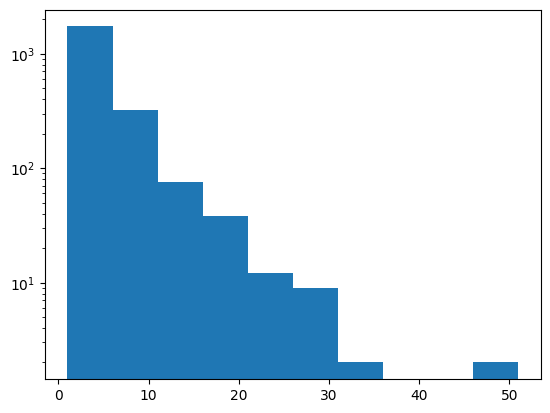

In [5]:
adj=conn.matrix.toarray()
weights=adj[adj!=0]
plt.hist(weights) 
plt.yscale("log")

### MICrONS data 

We will use the data from connectivity of the of the IARPA MICrONS mm^3 dataset (https://www.microns-explorer.org/cortical-mm3), formatted into a ConnectivityMatrix object.

Dowload the data from zenodo from https://zenodo.org/record/8364070 and place it under ``data_dir``.


Load the connectivity of the of the IARPA MICrONS mm^3 dataset (https://www.microns-explorer.org/cortical-mm3), formatted into a ConnectivityMatrix object as provided in https://zenodo.org/record/8364070
    To run this function it is required to dowload the data from zenodo and place it under data.
    The code of the function is extracted from the notebook ``Microns check edge effect.ipynb`` in the zenodo link above.
    """

In [6]:
exc_types=['23P', '4P', '5P_IT', '5P_NP', '5P_PT', '6CT', '6IT', 'BPC']
# Load data and restrict to EXC neurons
conn=read_connectomes.load_microns(data_dir).index("cell_type").isin(exc_types)

Sanity check your data by at least look at the distributions of the entries in your matrix.

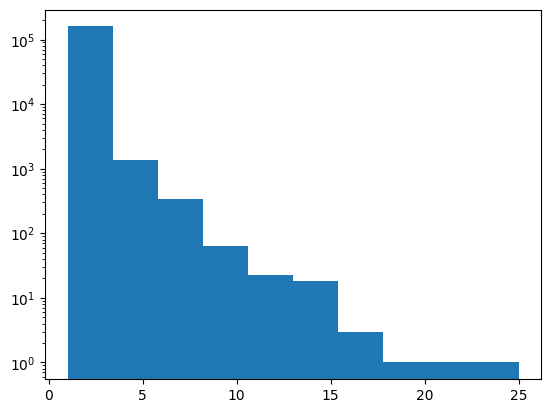

In [7]:
adj=conn.matrix.toarray()
weights=adj[adj!=0]
plt.hist(weights) 
plt.yscale("log")